Descriptive Statistics:
               Type  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean       1.19940           300.004930               310.005560   
std        0.60023             2.000259                 1.483734   
min        0.00000           295.300000               305.700000   
25%        1.00000           298.300000               308.800000   
50%        1.00000           300.100000               310.100000   
75%        2.00000           301.500000               311.100000   
max        2.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  \
count            10000.000000  10000.000000     10000.000000  10000.000000   
mean              1538.776100     39.986910       107.951000      0.033900   
std                179.284096      9.968934        63.654147      0.180981   
min               1168.000000      3.800000       

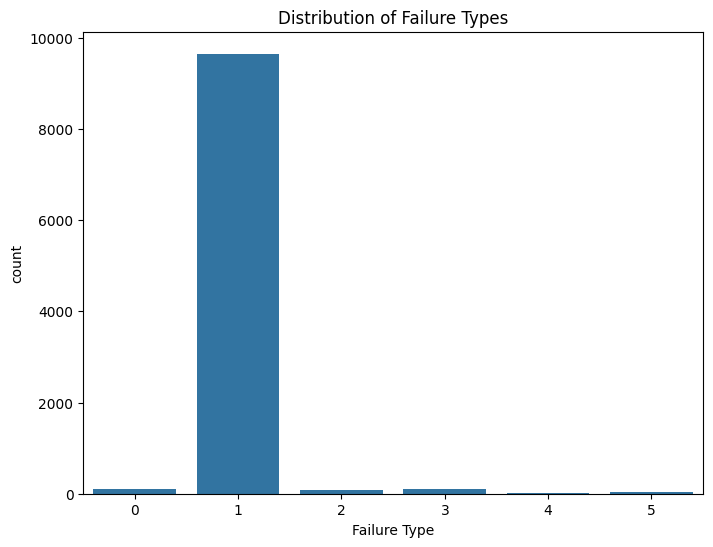

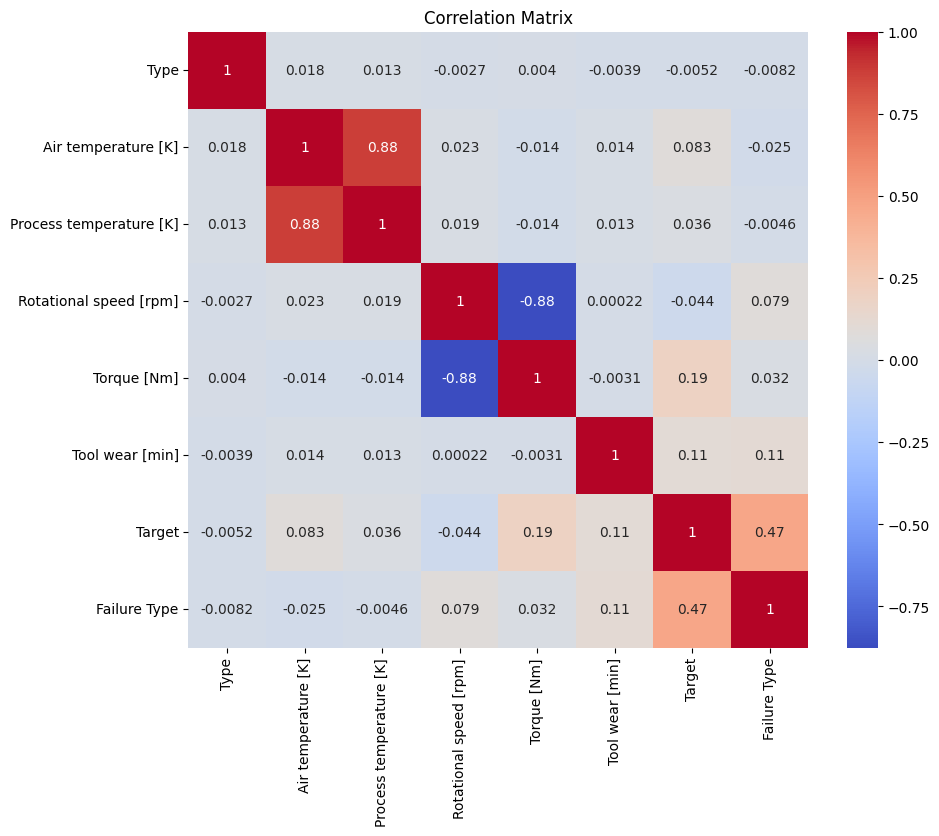

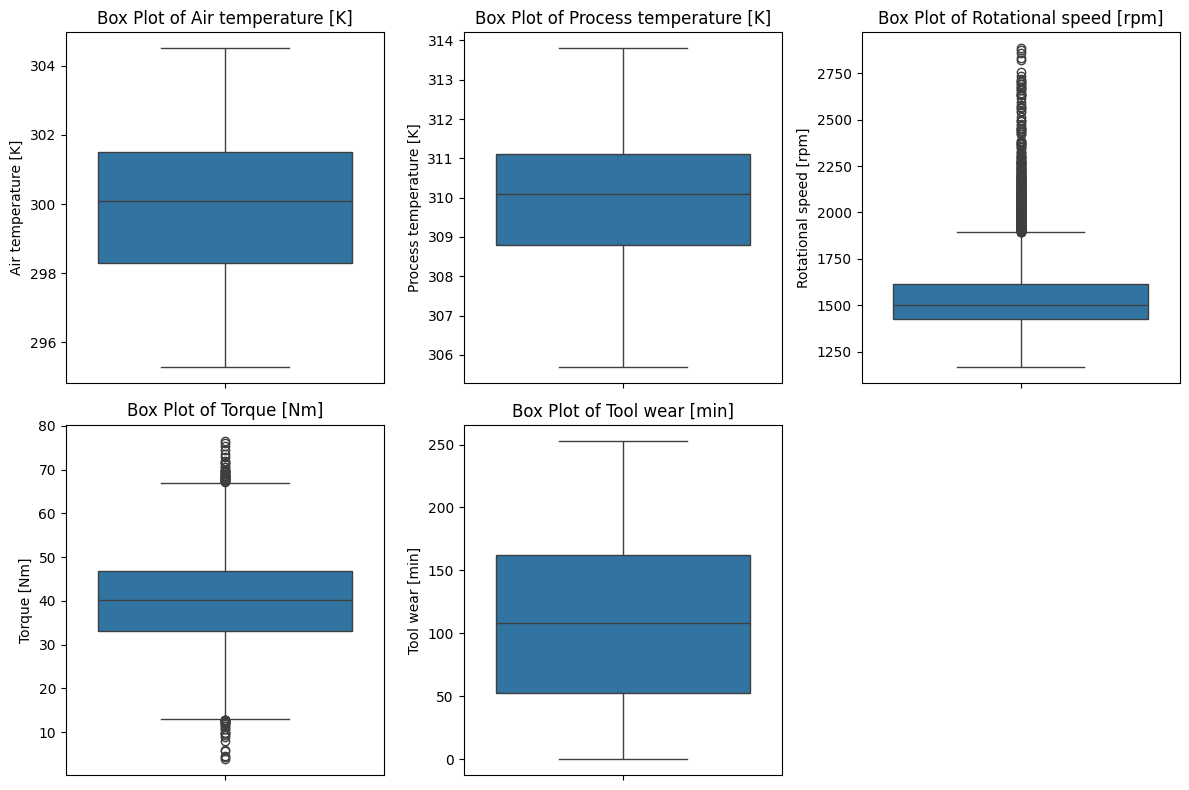

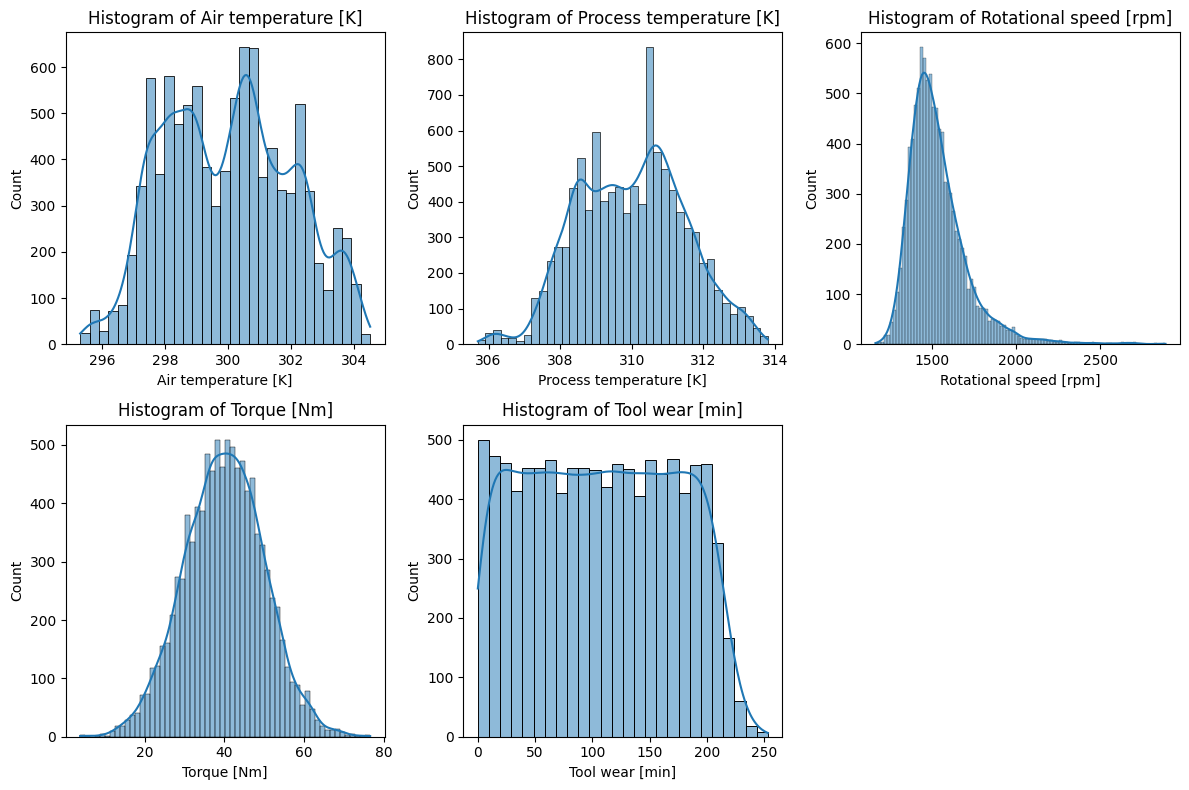

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Load the dataset
try:
    df = pd.read_csv("machine.csv")
except FileNotFoundError:
    print("Error: 'machine.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# 1. Data Cleaning

# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())
# Remove duplicates if any
df = df.drop_duplicates()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Remove the "UDI" and "Product ID" columns (as they are likely unique identifiers and not useful for prediction)
df = df.drop(['UDI', 'Product ID'], axis=1)


# 2. Data Preprocessing

# Encode categorical features
categorical_cols = ['Type']
for col in categorical_cols:
    df = pd.get_dummies(df, columns=[col], drop_first=True) # Use drop_first to avoid multicollinearity

# Encode the target variable 'Failure Type'
label_encoder = LabelEncoder()
df['Failure Type'] = label_encoder.fit_transform(df['Failure Type'])

# Separate features (X) and target (y)
X = df.drop('Failure Type', axis=1)
y = df['Failure Type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #stratify to keep the same propotion in test and train


# 3. Standardization/Normalization (after splitting to avoid data leakage)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the preprocessed data back to a DataFrame (optional, but good for inspection)
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

print("\nFirst 5 rows of preprocessed training data:")
print(X_train_df.head())
print("\nTarget variable distribution:")
print(df['Failure Type'].value_counts())

Descriptive Statistics:
               Type  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean       1.19940           300.004930               310.005560   
std        0.60023             2.000259                 1.483734   
min        0.00000           295.300000               305.700000   
25%        1.00000           298.300000               308.800000   
50%        1.00000           300.100000               310.100000   
75%        2.00000           301.500000               311.100000   
max        2.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  \
count            10000.000000  10000.000000     10000.000000  10000.000000   
mean              1538.776100     39.986910       107.951000      0.033900   
std                179.284096      9.968934        63.654147      0.180981   
min               1168.000000      3.800000       

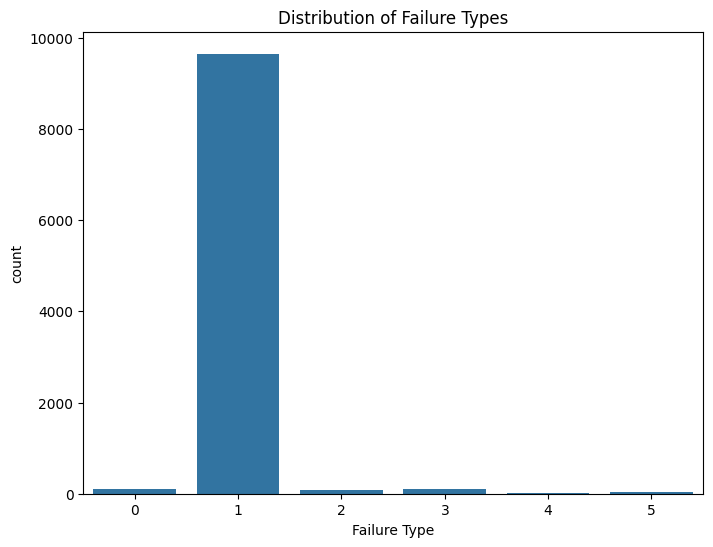

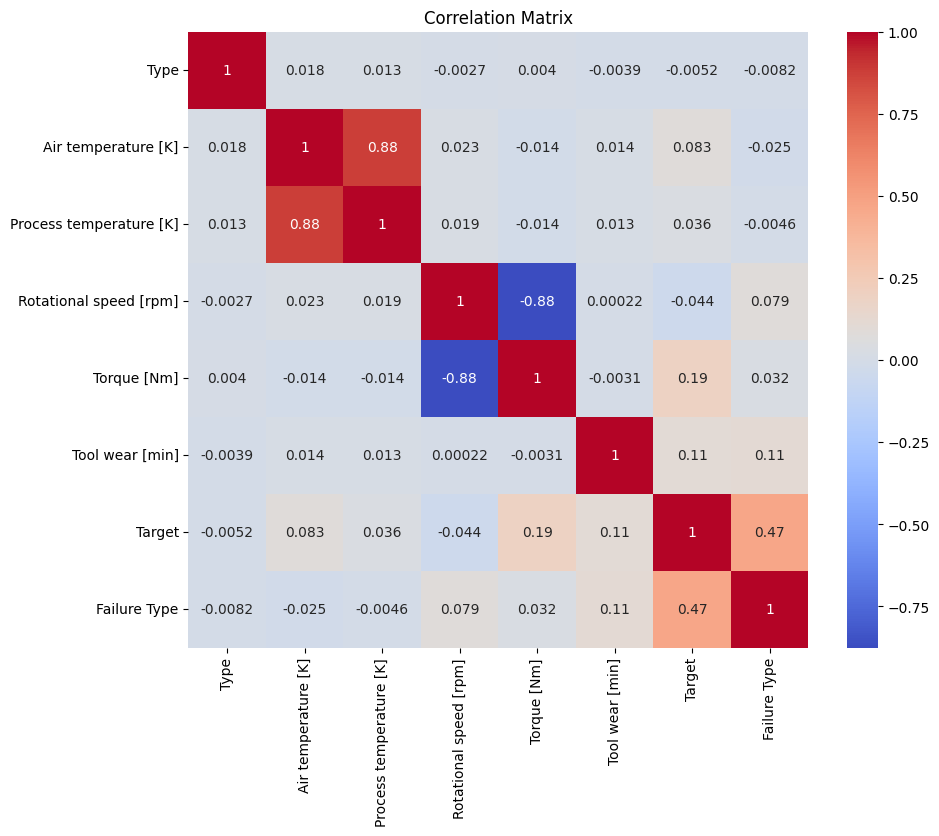

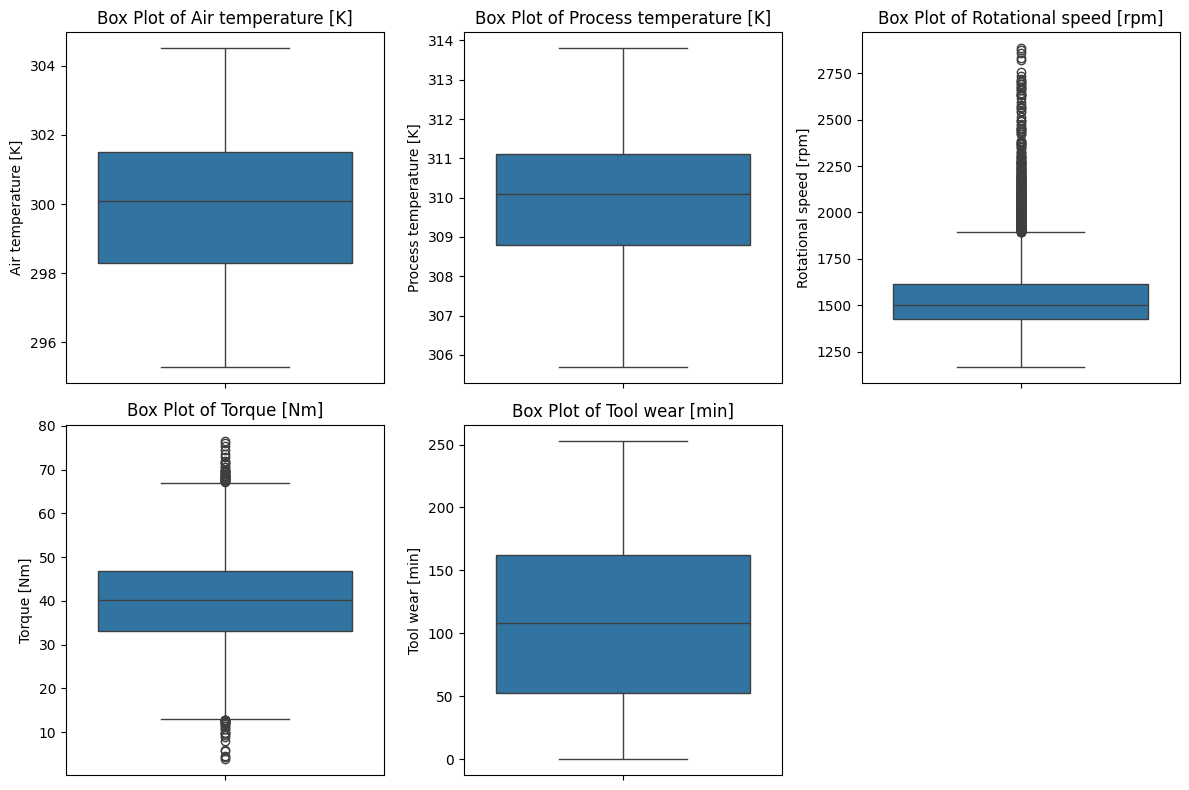

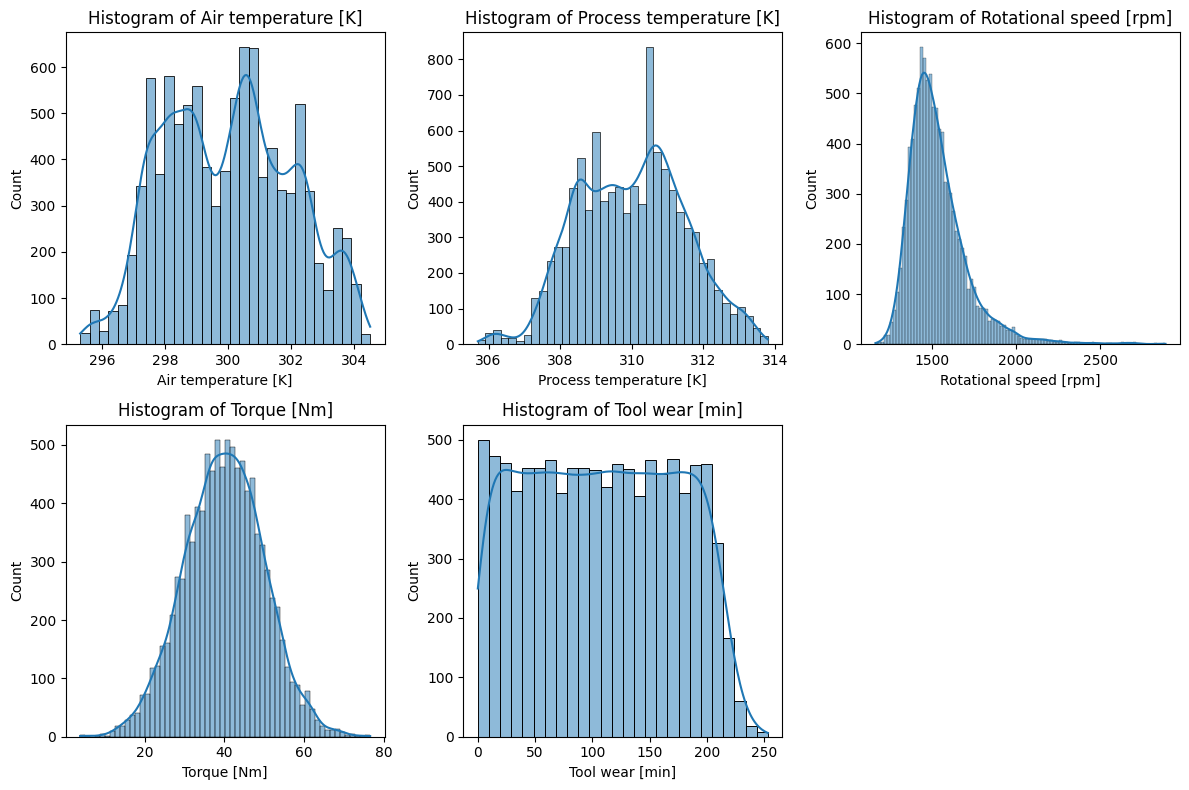

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
try:
    df = pd.read_csv("predictive_maintenance.csv")  # Corrected filename
except FileNotFoundError:
    print("Error: 'predictive_maintenance.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# Correct the column names
#df = df.rename(columns={'\ufeffUDI': 'UDI'})
df = df.drop(['Product ID'], axis=1) # Corrected to only drop 'Product ID' first

# Drop unnecessary columns
try:
    df = df.drop(['\ufeffUDI'], axis=1) # try dropping UDI
except KeyError:
    df = df.drop(['UDI'], axis=1, errors='ignore') # Ignore UDI if it doesn't exits

# Encode categorical feature 'Type' and target variable 'Failure Type'
label_encoder = LabelEncoder()
df['Failure Type'] = label_encoder.fit_transform(df['Failure Type'])
df['Type'] = label_encoder.fit_transform(df['Type'])

# 1. Descriptive Statistics
print("Descriptive Statistics:\n", df.describe())

# 2. Class Distribution of the Target Variable
print("\nClass Distribution of Failure Type:\n", df['Failure Type'].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x='Failure Type', data=df)
plt.title('Distribution of Failure Types')
plt.show()

# 3. Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 4. Pair Plots
# Select a subset of columns for pair plots due to performance (optional)
# pair_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Failure Type']
# sns.pairplot(df[pair_cols], hue='Failure Type')
# plt.suptitle('Pair Plots of Selected Features', y=1.02) # Adjust title position
# plt.show()

# 5. Box Plots to detect outliers
numerical_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# 6. Histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import numpy as np

# Load the dataset
try:
    df = pd.read_csv("predictive_maintenance.csv")  # Corrected filename
except FileNotFoundError:
    print("Error: 'predictive_maintenance.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# Correct the column names
#df = df.rename(columns={'\ufeffUDI': 'UDI'})
df = df.drop(['Product ID'], axis=1) # Corrected to only drop 'Product ID' first

# Drop unnecessary columns
try:
    df = df.drop(['\ufeffUDI'], axis=1) # try dropping UDI
except KeyError:
    df = df.drop(['UDI'], axis=1, errors='ignore') # Ignore UDI if it doesn't exits

# Encode categorical features and target variable
label_encoder = LabelEncoder()
df['Failure Type'] = label_encoder.fit_transform(df['Failure Type'])
categorical_cols = ['Type']
for col in categorical_cols:
    df = pd.get_dummies(df, columns=[col], drop_first=True)

# Separate features (X) and target (y)
X = df.drop('Failure Type', axis=1)
y = df['Failure Type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert the resampled data to DataFrames
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)
y_train_resampled_df = pd.Series(y_train_resampled)

# Print the class distribution after SMOTE
print("Class distribution after applying SMOTE:\n", y_train_resampled_df.value_counts())

#Standardize after oversampling
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)


X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

Class distribution after applying SMOTE:
 Failure Type
1    7722
5    7722
4    7722
3    7722
0    7722
2    7722
Name: count, dtype: int64


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Define a custom dataset class
class MaintenanceDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long) # Use torch.long for classification

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Define the DNN model
class MaintenanceDNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(MaintenanceDNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(hidden_size2, num_classes)  # Output layer for classification

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.layer3(x)  # No softmax here, CrossEntropyLoss will handle it
        return x

# Load the dataset
try:
    df = pd.read_csv("predictive_maintenance.csv")
except FileNotFoundError:
    print("Error: 'predictive_maintenance.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# Correct the column names
#df = df.rename(columns={'\ufeffUDI': 'UDI'})
df = df.drop(['Product ID'], axis=1) # Corrected to only drop 'Product ID' first

# Drop unnecessary columns
try:
    df = df.drop(['\ufeffUDI'], axis=1) # try dropping UDI
except KeyError:
    df = df.drop(['UDI'], axis=1, errors='ignore') # Ignore UDI if it doesn't exits

# Encode categorical features and target variable
label_encoder = LabelEncoder()
df['Failure Type'] = label_encoder.fit_transform(df['Failure Type'])
categorical_cols = ['Type']
for col in categorical_cols:
    df = pd.get_dummies(df, columns=[col], drop_first=True)

# Separate features (X) and target (y)
X = df.drop('Failure Type', axis=1)
y = df['Failure Type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the data (after splitting and SMOTE)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Create DataLoaders
train_dataset = MaintenanceDataset(X_train_resampled, y_train_resampled)
test_dataset = MaintenanceDataset(X_test, y_test.values)  # Convert y_test to a NumPy array

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Instantiate the model
input_size = X_train_resampled.shape[1]
hidden_size1 = 64
hidden_size2 = 32
num_classes = len(df['Failure Type'].unique())  # Number of classes in target variable
model = MaintenanceDNN(input_size, hidden_size1, hidden_size2, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss() # Use CrossEntropyLoss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Finished Training")

Epoch [1/10], Loss: 0.0555
Epoch [2/10], Loss: 0.0221
Epoch [3/10], Loss: 0.0089
Epoch [4/10], Loss: 0.0160
Epoch [5/10], Loss: 0.0395
Epoch [6/10], Loss: 0.0015
Epoch [7/10], Loss: 0.0036
Epoch [8/10], Loss: 0.1500
Epoch [9/10], Loss: 0.0620
Epoch [10/10], Loss: 0.0007
Finished Training


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
import numpy as np

# Define a custom dataset class
class MaintenanceDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)  # Use torch.long for classification

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Define the DNN model
class MaintenanceDNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(MaintenanceDNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(hidden_size2, num_classes)  # Output layer for classification

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.layer3(x)  # No softmax here, CrossEntropyLoss will handle it
        return x

# Load the dataset
try:
    df = pd.read_csv("predictive_maintenance.csv")  # Corrected filename
except FileNotFoundError:
    print("Error: 'predictive_maintenance.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# Correct the column names
#df = df.rename(columns={'\ufeffUDI': 'UDI'})
df = df.drop(['Product ID'], axis=1) # Corrected to only drop 'Product ID' first

# Drop unnecessary columns
try:
    df = df.drop(['\ufeffUDI'], axis=1) # try dropping UDI
except KeyError:
    df = df.drop(['UDI'], axis=1, errors='ignore') # Ignore UDI if it doesn't exits

# Encode categorical features and target variable
label_encoder = LabelEncoder()
df['Failure Type'] = label_encoder.fit_transform(df['Failure Type'])
categorical_cols = ['Type']
for col in categorical_cols:
    df = pd.get_dummies(df, columns=[col], drop_first=True)

# Separate features (X) and target (y)
X = df.drop('Failure Type', axis=1)
y = df['Failure Type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the data (after splitting and SMOTE)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Create DataLoaders
train_dataset = MaintenanceDataset(X_train_resampled, y_train_resampled)
test_dataset = MaintenanceDataset(X_test, y_test.values) # Convert y_test to a NumPy array

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the hyperparameter grid
param_grid = {
    'lr': [0.001, 0.01, 0.1],
    'optimizer': ['Adam', 'SGD'],
    'hidden_size1': [32, 64],
    'hidden_size2': [16, 32],
    'epochs': [5, 10]
}

# Grid Search Function
def train_and_evaluate(params):
    # Model instantiation
    num_classes = len(df['Failure Type'].unique())
    model = MaintenanceDNN(X_train_resampled.shape[1], params['hidden_size1'], params['hidden_size2'], num_classes)

    # Optimizer selection
    if params['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=params['lr'])
    else:
        optimizer = optim.SGD(model.parameters(), lr=params['lr'])

    criterion = nn.CrossEntropyLoss()

    # Training loop
    for epoch in range(params['epochs']):
        for inputs, labels in train_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluation on test set
    model.eval()
    all_preds = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)  # Get the predicted class
            all_preds.extend(predicted.numpy())

    accuracy = accuracy_score(y_test, all_preds) # Evaluate using accuracy

    return accuracy

# Perform Grid Search
best_accuracy = 0.0
best_params = None

grid = ParameterGrid(param_grid)

for params in grid:
    print(f"Training with parameters: {params}")
    accuracy = train_and_evaluate(params)
    print(f"Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print(f"Best parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy:.4f}")

Training with parameters: {'epochs': 5, 'hidden_size1': 32, 'hidden_size2': 16, 'lr': 0.001, 'optimizer': 'Adam'}
Accuracy: 0.9310
Training with parameters: {'epochs': 5, 'hidden_size1': 32, 'hidden_size2': 16, 'lr': 0.001, 'optimizer': 'SGD'}
Accuracy: 0.7550
Training with parameters: {'epochs': 5, 'hidden_size1': 32, 'hidden_size2': 16, 'lr': 0.01, 'optimizer': 'Adam'}
Accuracy: 0.9715
Training with parameters: {'epochs': 5, 'hidden_size1': 32, 'hidden_size2': 16, 'lr': 0.01, 'optimizer': 'SGD'}
Accuracy: 0.8120
Training with parameters: {'epochs': 5, 'hidden_size1': 32, 'hidden_size2': 16, 'lr': 0.1, 'optimizer': 'Adam'}
Accuracy: 0.9955
Training with parameters: {'epochs': 5, 'hidden_size1': 32, 'hidden_size2': 16, 'lr': 0.1, 'optimizer': 'SGD'}
Accuracy: 0.9385
Training with parameters: {'epochs': 5, 'hidden_size1': 32, 'hidden_size2': 32, 'lr': 0.001, 'optimizer': 'Adam'}
Accuracy: 0.9455
Training with parameters: {'epochs': 5, 'hidden_size1': 32, 'hidden_size2': 32, 'lr': 0.001,

Epoch [1/50], Train Loss: 0.2794, Train Acc: 0.9061, Test Loss: 0.2773, Test Acc: 0.8620
Epoch [2/50], Train Loss: 0.0829, Train Acc: 0.9738, Test Loss: 0.1780, Test Acc: 0.9220
Epoch [3/50], Train Loss: 0.0512, Train Acc: 0.9853, Test Loss: 0.1682, Test Acc: 0.9400
Epoch [4/50], Train Loss: 0.0367, Train Acc: 0.9905, Test Loss: 0.1294, Test Acc: 0.9625
Epoch [5/50], Train Loss: 0.0288, Train Acc: 0.9924, Test Loss: 0.1430, Test Acc: 0.9590
Epoch [6/50], Train Loss: 0.0245, Train Acc: 0.9933, Test Loss: 0.1453, Test Acc: 0.9630
Epoch [7/50], Train Loss: 0.0206, Train Acc: 0.9945, Test Loss: 0.1157, Test Acc: 0.9785
Epoch [8/50], Train Loss: 0.0187, Train Acc: 0.9952, Test Loss: 0.1506, Test Acc: 0.9665
Epoch [9/50], Train Loss: 0.0170, Train Acc: 0.9955, Test Loss: 0.1100, Test Acc: 0.9830
Epoch [10/50], Train Loss: 0.0157, Train Acc: 0.9958, Test Loss: 0.1299, Test Acc: 0.9750
Epoch [11/50], Train Loss: 0.0142, Train Acc: 0.9962, Test Loss: 0.1357, Test Acc: 0.9760
Epoch [12/50], Trai

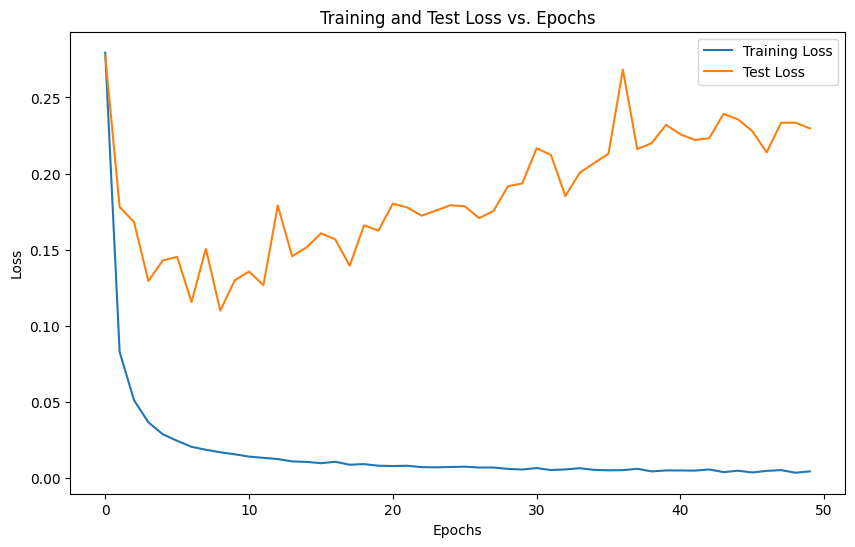

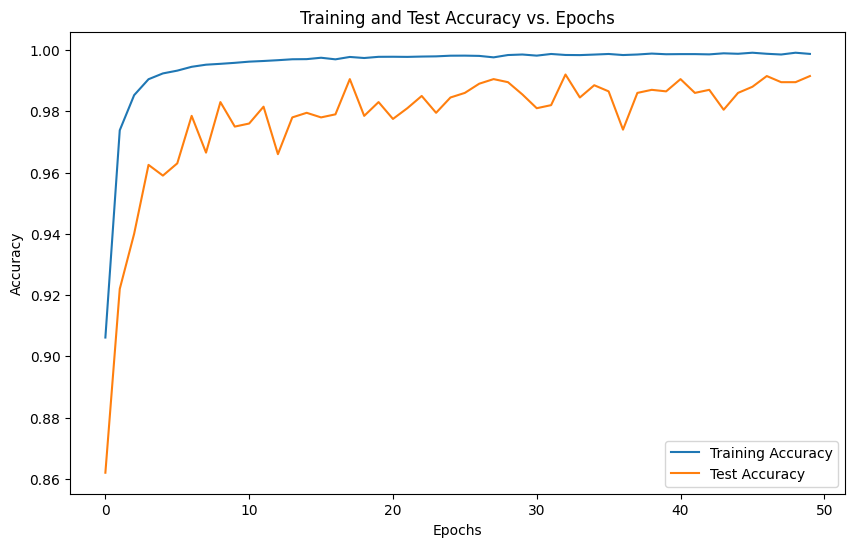

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

# Define a custom dataset class
class MaintenanceDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long) # Use torch.long for classification

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Define the DNN model
class MaintenanceDNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(MaintenanceDNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(hidden_size2, num_classes)  # Output layer for classification

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.layer3(x)  # No softmax here, CrossEntropyLoss will handle it
        return x

# Load the dataset
try:
    df = pd.read_csv("predictive_maintenance.csv")  # Corrected filename
except FileNotFoundError:
    print("Error: 'predictive_maintenance.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# Correct the column names
#df = df.rename(columns={'\ufeffUDI': 'UDI'})
df = df.drop(['Product ID'], axis=1) # Corrected to only drop 'Product ID' first

# Drop unnecessary columns
try:
    df = df.drop(['\ufeffUDI'], axis=1) # try dropping UDI
except KeyError:
    df = df.drop(['UDI'], axis=1, errors='ignore') # Ignore UDI if it doesn't exits


# Encode categorical features and target variable
label_encoder = LabelEncoder()
df['Failure Type'] = label_encoder.fit_transform(df['Failure Type'])
categorical_cols = ['Type']
for col in categorical_cols:
    df = pd.get_dummies(df, columns=[col], drop_first=True)

# Separate features (X) and target (y)
X = df.drop('Failure Type', axis=1)
y = df['Failure Type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the data (after splitting and SMOTE)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Create DataLoaders
train_dataset = MaintenanceDataset(X_train_resampled, y_train_resampled)
test_dataset = MaintenanceDataset(X_test, y_test.values) # Convert y_test to a NumPy array

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Instantiate the model
input_size = X_train_resampled.shape[1]
hidden_size1 = 64
hidden_size2 = 32
num_classes = len(df['Failure Type'].unique())  # Number of classes in target variable
model = MaintenanceDNN(input_size, hidden_size1, hidden_size2, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss() # Use CrossEntropyLoss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with loss and accuracy tracking
num_epochs = 50
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0.0
    train_preds = []
    train_labels = []

    for inputs, labels in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)

        _, predicted = torch.max(outputs, 1)
        train_preds.extend(predicted.numpy())
        train_labels.extend(labels.numpy())

    train_loss = train_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    train_accuracy = accuracy_score(train_labels, train_preds)
    train_accuracies.append(train_accuracy)

    # Testing
    model.eval()
    test_loss = 0.0
    test_preds = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            test_preds.extend(predicted.numpy())

    test_loss = test_loss / len(test_loader.dataset)
    test_losses.append(test_loss)
    test_accuracy = accuracy_score(y_test, test_preds)
    test_accuracies.append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.4f}')

# Plotting Loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss vs. Epochs')
plt.legend()
plt.show()

# Plotting Accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy vs. Epochs')
plt.legend()
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Define a custom dataset class
class MaintenanceDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long) # Use torch.long for classification

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Define the DNN model
class MaintenanceDNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(MaintenanceDNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(hidden_size2, num_classes)  # Output layer for classification

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.layer3(x)  # No softmax here, CrossEntropyLoss will handle it
        return x

# Load the dataset
try:
    df = pd.read_csv("predictive_maintenance.csv")  # Corrected filename
except FileNotFoundError:
    print("Error: 'predictive_maintenance.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# Correct the column names
#df = df.rename(columns={'\ufeffUDI': 'UDI'})
df = df.drop(['Product ID'], axis=1) # Corrected to only drop 'Product ID' first

# Drop unnecessary columns
try:
    df = df.drop(['\ufeffUDI'], axis=1) # try dropping UDI
except KeyError:
    df = df.drop(['UDI'], axis=1, errors='ignore') # Ignore UDI if it doesn't exits

# Encode categorical features and target variable
label_encoder = LabelEncoder()
df['Failure Type'] = label_encoder.fit_transform(df['Failure Type'])
categorical_cols = ['Type']
for col in categorical_cols:
    df = pd.get_dummies(df, columns=[col], drop_first=True)

# Separate features (X) and target (y)
X = df.drop('Failure Type', axis=1)
y = df['Failure Type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the data (after splitting and SMOTE)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Create DataLoaders
train_dataset = MaintenanceDataset(X_train_resampled, y_train_resampled)
test_dataset = MaintenanceDataset(X_test, y_test.values) # Convert y_test to a NumPy array

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Instantiate the model
input_size = X_train_resampled.shape[1]
hidden_size1 = 64
hidden_size2 = 32
num_classes = len(df['Failure Type'].unique())  # Number of classes in target variable
model = MaintenanceDNN(input_size, hidden_size1, hidden_size2, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss() # Use CrossEntropyLoss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Finished Training")

# Evaluation metrics

def calculate_metrics(model, data_loader, y_true):
    model.eval()  # Set the model to evaluation mode
    all_preds = []

    with torch.no_grad():  # Disable gradient calculation
        for inputs, labels in data_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)  # Get the predicted class
            all_preds.extend(predicted.numpy())

    accuracy = accuracy_score(y_true, all_preds)
    precision = precision_score(y_true, all_preds, average='weighted', zero_division=0) # Handle zero division
    recall = recall_score(y_true, all_preds, average='weighted', zero_division=0) # Handle zero division
    f1 = f1_score(y_true, all_preds, average='weighted')
    confusion = confusion_matrix(y_true, all_preds)

    return accuracy, precision, recall, f1, confusion

# Calculate metrics for training data
train_accuracy, train_precision, train_recall, train_f1, train_confusion = calculate_metrics(model, train_loader, y_train_resampled)

print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print("Confusion Matrix:\n", train_confusion)

# Calculate metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_confusion = calculate_metrics(model, test_loader, y_test)

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print("Confusion Matrix:\n", test_confusion)

Finished Training
Training Metrics:
Accuracy: 0.1683
Precision: 0.1682
Recall: 0.1683
F1 Score: 0.1682
Confusion Matrix:
 [[1249 1296 1276 1268 1300 1333]
 [1322 1232 1282 1358 1261 1267]
 [1278 1240 1316 1280 1312 1296]
 [1236 1288 1310 1341 1285 1262]
 [1331 1241 1268 1202 1387 1293]
 [1314 1281 1262 1276 1318 1271]]

Test Metrics:
Accuracy: 0.9770
Precision: 0.9944
Recall: 0.9770
F1 Score: 0.9854
Confusion Matrix:
 [[  22    0    0    0    0    0]
 [   0 1892    0    0   38    0]
 [   0    0   16    0    0    0]
 [   0    0    2   17    0    0]
 [   0    4    0    0    0    0]
 [   0    0    2    0    0    7]]


In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import numpy as np

# Load your data (replace with your actual loading and preprocessing)
data = pd.read_csv("predictive_maintenance.csv")
data = data.drop(columns=['UDI', 'Product ID'])

# Separate features and target
X = data.drop(columns=['Target'])
y = data['Target']

# Check data types before one-hot encoding
print("Data types before one-hot encoding:")
print(X.dtypes)
print(X.head())  # Print the first few rows to inspect the data

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Type'])

# Check for unexpected 'object' columns *immediately* after one-hot encoding
object_columns = X.select_dtypes(include=['object']).columns
if not object_columns.empty:
    print("Object columns detected after one-hot encoding:", object_columns)
    for col in object_columns:
        print(f"Unique values in column '{col}': {X[col].unique()}")  # Print unique values in each object column

# Explicitly handle 'Failure Type' column in the original DataFrame (before one-hot encoding)
if 'Failure Type' in data.columns:  # Corrected column name
    print("Handling 'Failure Type' column...")
    print(data['Failure Type'].unique())  # Print unique values to understand what's there

    # This is the most likely place where "No Failure" is present in your data
    # Replace "No Failure" with NaN (NumPy's representation of missing values)
    data['Failure Type'] = data['Failure Type'].replace("No Failure", np.nan)

    # Now you have a choice:
    # 1.  Drop rows with NaN in 'Failure Type' (if appropriate):
    data.dropna(subset=['Failure Type'], inplace=True)  # Remove rows where 'Failure Type' is NaN
    # Update X and y after dropping rows:
    X = data.drop(columns=['Target', 'Failure Type'])  # Important: Drop original column
    y = data['Target'] # target column

    # Convert categorical features to numerical using one-hot encoding
    X = pd.get_dummies(X, columns=['Type'])


    # 2. Or Impute with a suitable value  if  'Failure Type' was intended to be  numeric column
    # data['Failure Type'] = pd.to_numeric(data['Failure Type'], errors='coerce')  # Convert to numeric, coerce errors to NaN
    # data['Failure Type'] = data['Failure Type'].fillna(data['Failure Type'].mean())  # Impute with the mean or other suitable value.
    # X = data.drop(columns=['Target'])
    # y = data['Target']
    # Convert categorical features to numerical using one-hot encoding
    # X = pd.get_dummies(X, columns=['Type'])


# Check data types after handling 'Failure Type' and *after* one-hot encoding
print("Data types after handling 'Failure Type' and one-hot encoding:")
print(X.dtypes)

# Check for non-numeric values *after* one-hot encoding
for col in X.columns:
    try:
        X[col] = pd.to_numeric(X[col])  # Try to convert each column to numeric
    except ValueError:
        print(f"Column {col} cannot be converted to numeric. Inspect it!")

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.int64)  # Ensure y is long for CrossEntropyLoss

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Data types before one-hot encoding:
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Failure Type                object
dtype: object
  Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   
2    L                298.1                    308.5                    1498   
3    L                298.2                    308.6                    1433   
4    L                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min] Failure Type  
0         42.8                0   No Failure  
1         46.3                3   No Failure  
2         49.4                5   No Failure  
3         39.5                7   No